### Priority Queues

This is a type of queue with priority being served first.

| Operation | Description |
| -- | -- |
| `myP.add(k, v)` | Add an element with key `k` and value `v` into the priority queue `myP`. |
| `myP.min()` | Obtain an element with a pair of `(k, v)`, where `k` is the minimum value of keys in `myP`, but do not remove the element from the queue. If `myP` is empty, then obtain an error. |
| `myP.remove_min()` | Obtain an element with a pair of `(k, v)`, where `k` is the minimum value of keys in `myP`, and remove the element from the queue. If `myP` is empty, then obtain an error. |
| `myP.is_empty()` | Return `True` if `myP` is empty. Otherwise return `False`. |
| `size(myP)` | Return the number of elements in `myP`. |

For a **sorted priority queue**, the queue is sorted each time an `add()` is called.

For an **unsorted priority queue**, the queue is only sorted when `remove_min()` or `min()` is called.

Implementation with a doubly linked list (sorted) with minimum as the priority,

In [2]:
class Node:
    
    def __init__(self, priority, element, prev = None, nxt = None):
        self.prev = prev
        self.next = nxt
        self.priority = priority
        self.element = element


class PriorityQueue:

    def __init__(self): 
        self.head = None 
        self.tail = None
        self.size = 0
    
    def __len__(self): 
        return self.size
    
    def __iter__(self):
        cur = self.head
        
        while cur:
            yield cur.priority, cur.element
            cur = cur.next
    
    def add(self, priority, element):
        node = Node(priority, element)
        
        if not self.head:
            self.head = node
            self.tail = node
            self.size += 1
            return True

        prev = None
        cur = self.head

        while cur:
            if node.priority < cur.priority:
                if cur == self.head:
                    self.head = node
                else:
                    node.prev = prev
                    prev.next = node

                node.next = cur
                cur.prev = node
                self.size += 1
                return True
            
            prev = cur
            cur = cur.next
        
        prev.next = node
        node.prev = prev
        self.tail = node
        self.size += 1
        return True
        
    def remove_min(self): 
        if self.is_empty(): 
            return None

        node = self.head
        
        if self.size == 1:
            self.head = None
            self.tail = None
        else:
            self.head = node.next

        self.size -= 1
        return node.priority, node.element
    
    def min(self): 
        if self.is_empty(): 
            return None

        return self.head.priority, self.head.element
    
    def is_empty(self): 
        return self.size == 0

minQ = PriorityQueue()

minQ.add(4, "A")
minQ.add(5, "B")
minQ.add(6, "C")
minQ.add(6, "D")
  
print("     queue: ", " → ".join([v for k,v in minQ]))
print("       min: ", minQ.min())

minQ.add(3, "E")
minQ.add(2, "F")
minQ.add(1, "G")

print("     queue: ", " → ".join([v for k,v in minQ]))
print("       min: ", minQ.min())
minQ.remove_min()
print("remove min: ", " → ".join([v for k,v in minQ]))

     queue:  A → B → C → D
       min:  (4, 'A')
     queue:  G → F → E → A → B → C → D
       min:  (1, 'G')
remove min:  F → E → A → B → C → D


### Heap Binary Tree

It is a binary tree with 2 additional properties:

- **Heap-Order Property**: For any position $p$ other than the root, the key value $k_p$ at the position $p$ is greater than or equal to the key value at its parent $k_f$. So for a path from the root to a leaf, the key values are in non-decreasing order, and the key value at the root is always the smallest.

- **Complete Binary Tree Property** (or **Total**): In order to achieve the efficiency, the height $h$ of a heap binary tree shall be as small as possible - therefore it shall be a complete binary tree such that at levels $0, 1, 2, …, h-1$.

Notations used:

- $T$: Heap binary tree
- $h$: Height of $T$
- $n$: Total node number

The total number of nodes is:

$2^0 + 2^1 + 2^2 + ... + 2^{h-1} = 2^h - 1$

At level $h$, the number of nodes is at least `1` or at most $2^h$.

#### Adding an element to the heap

| Step 1 | Step 2 | Step 3 |
| -- | -- | -- |
| 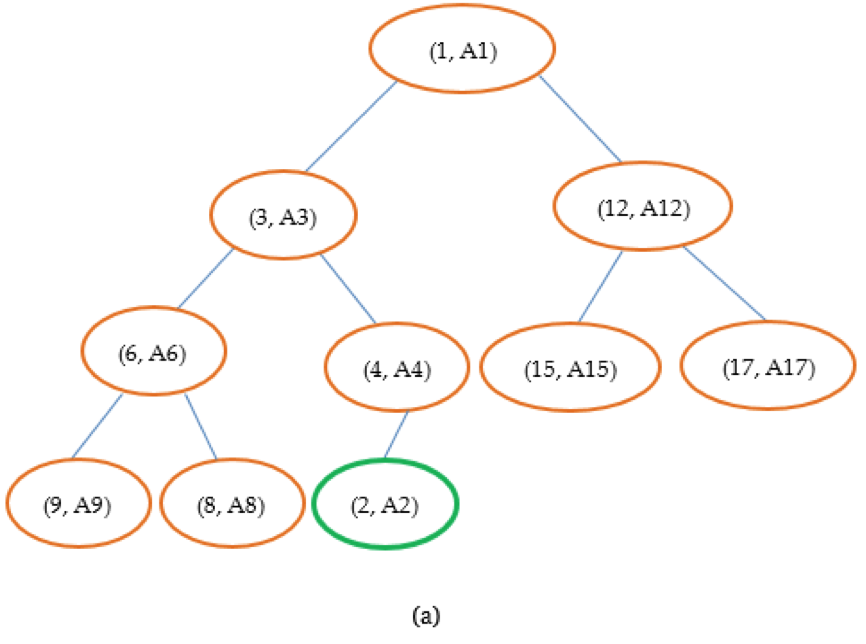 | 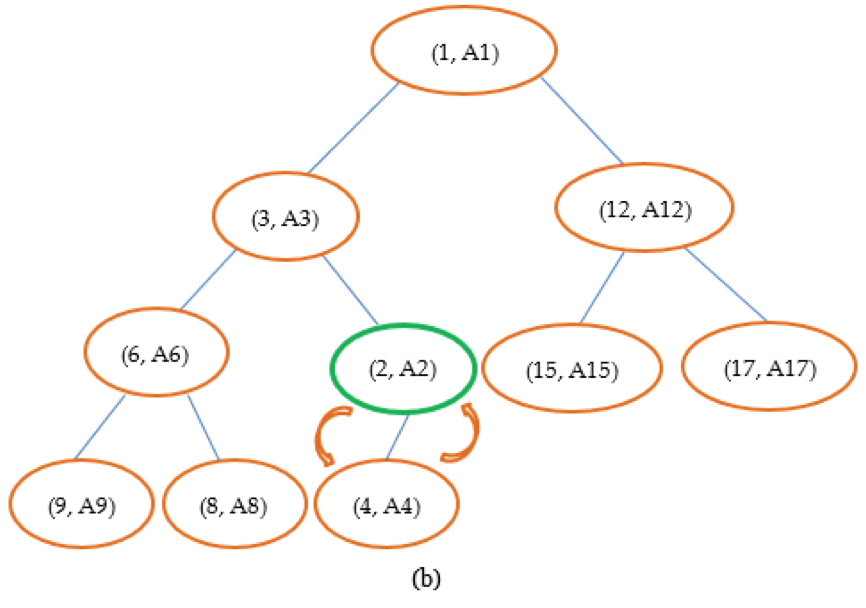 | 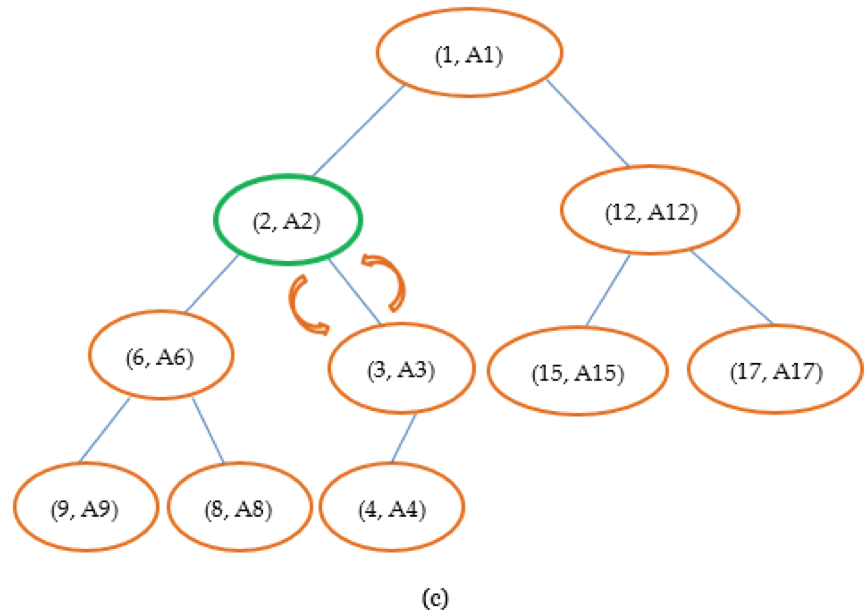 |

**Steps:**

1. If $p$ is the root, stop.
2. If $p$ is not root, the key $k_p$ of $p$ is compared with the key  of $p$’s parent key $k_f$.
3. If $k_p \geq k_f$, it already meets the heap-order property and hence stop.
4. If $k_p < k_f$, swap the new element p with its parent $f$.
5. Repeat steps 1 to 4 until it meets the heap-order property.

#### Removing the minimum element from the heap

| Step 1 | Step 2 | Step 3 | Step 4 |
| -- | -- | -- | -- |
| 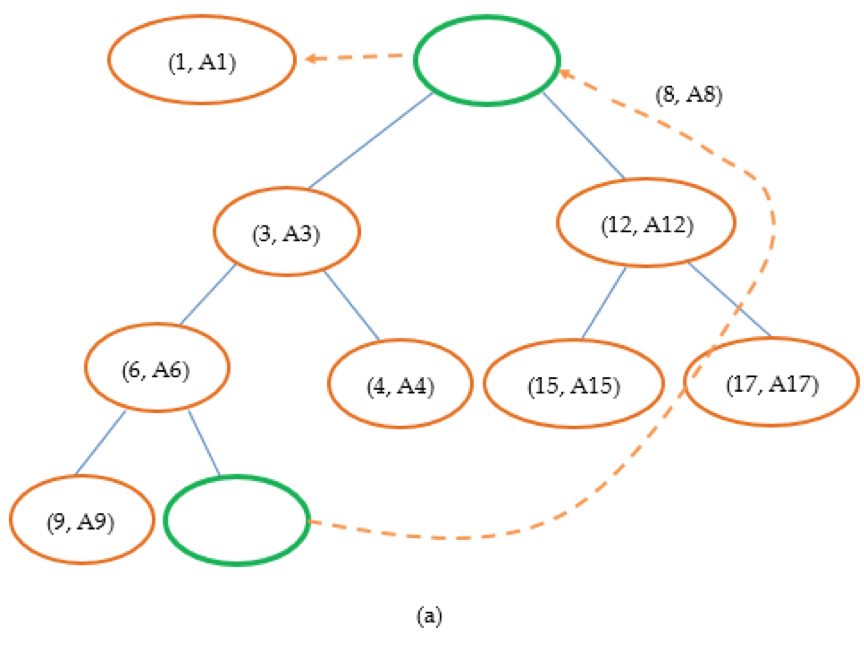 | 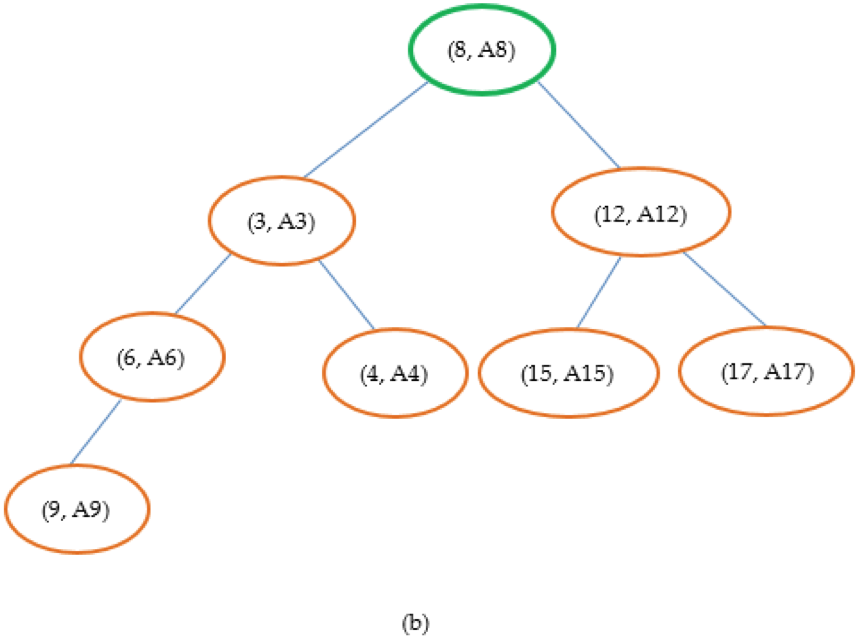 | 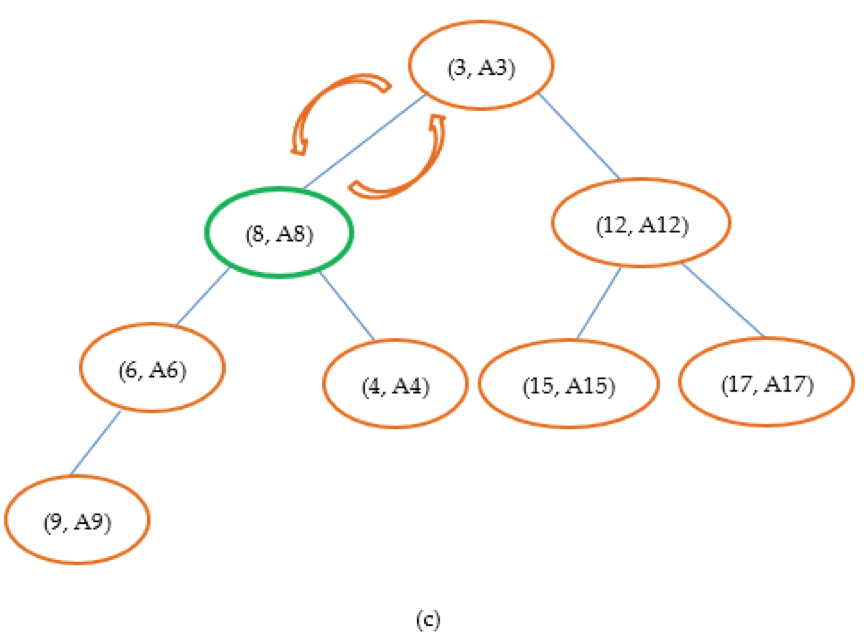 | 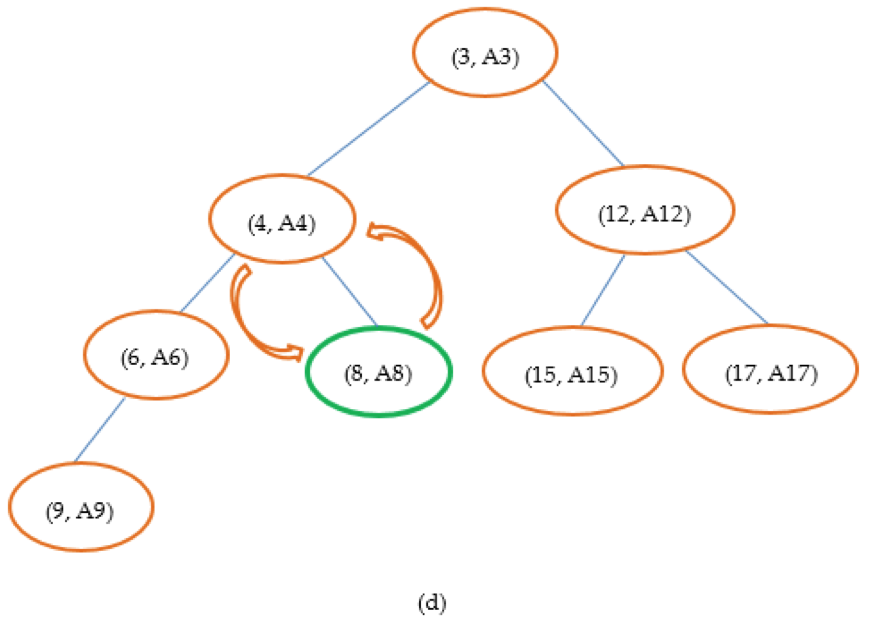 |

**Steps:**

1. Remove the root with the minimum key value.
2. If the heap tree is empty, stop.
3. Store the last node in the heap binary tree to the root position $p$.
4. If $p$ has only left child, let $c$ be the left child of $p$. If $p$ has both left child and right child, let $c$ be the child with the smaller key value.
5. Compare the key $k_p$ at $p$ with the key $k_c$ at the child.
6. If $k_p \leq k_c$, it already fulfils the heap-order property and hence stop.
7. If $k_p > k_c$, swap the $p$ with its child $c$.
8. Repeat steps 4 to 7 until it meets the heap-order property.

#### Representing as an array

| Before insertion | After insertion |
| -- | -- |
| 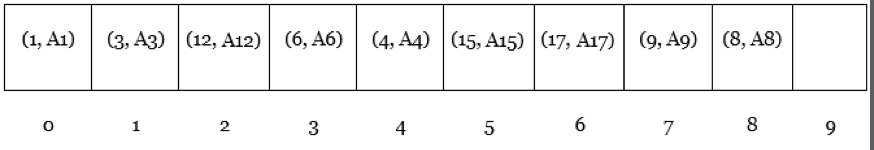 | 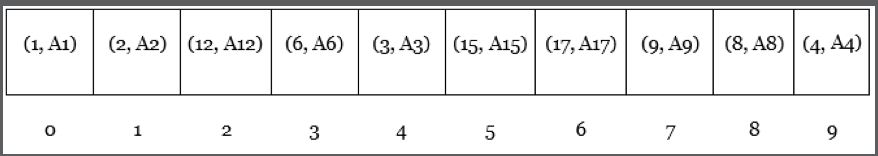 |

1. If the element $p$ is root, it is stored at index `0` (e.g. $f(p) = 0$)
2. For an element $p$ at position $f(p)$, its left child $l$ is at $f(l)= 2f(p) + 1$, its right child $r$ is at $f(r)= 2f(p) + 2$
3. For an element $p$ at position $f(p)$, its $parent(q)$’s position can be calculated as $f(q)= ⌊(f(p) - 1)/2⌋$

For a **complete binary tree** of size $n$, the elements are stored in the array continuously without any gap from index `0` to index $n - 1$. The space complexity to store the complete binary tree in the array is $O(n)$.

([Visualise here](https://www.cs.usfca.edu/~galles/visualization/Heap.html))

Implementation using a minimum heap binary tree (for maximum inverse the sorting logic),

In [3]:
class Heap:
    
    def __init__(self): 
        self.arr = []
        
    def __len__(self) -> int: 
        return len(self.arr) 
    
    def __iter__(self):
        if len(self.arr) == 0: 
            return None 
        return iter(self.arr)
    
    def _parent(self, i):
        if not i:
            raise ValueError("index cannot be 0")
        return int((i-1)/2)
    
    def _left_child(self, i):
        return 2 * i + 1

    def _right_child(self, i):
        return 2 * i + 2
        
    def _sift_up(self, i: int): 
        while i > 0 and self.arr[i][0] < self.arr[self._parent(i)][0]: 
            self.arr[self._parent(i)], self.arr[i] = self.arr[i], self.arr[self._parent(i)]
            i = self._parent(i)
    
    def _sift_down(self, i: int): 
        while self._left_child(i) < len(self.arr): 
            n1 = self._left_child(i)
            n2 = self._right_child(i)
            
            if n2 < len(self.arr) and self.arr[n2][0] < self.arr[n1][0]:
                n1 = n2 
            
            if self.arr[i] <= self.arr[n1]:
                break 
            
            self.arr[i], self.arr[n1] = self.arr[n1], self.arr[i]
            i = n1 
    
    def add(self, priority, element):  
        self.arr.append((priority, element))
        
        if len(self.arr) == 1:
            return 
        
        self._sift_up(len(self.arr) - 1)
        
    def remove_min(self): 
        if self.is_empty():
            return None
        
        result = self.arr[0]
        self.arr[0] = self.arr[len(self.arr) - 1]
        self.arr.pop() 
        self._sift_down(0)
        return result
    
    def min(self): 
        if len(self.arr) == 0: 
            return None 
        
        return arr[0]
    
    def is_empty(self): 
        return len(self.arr) == 0

minH = Heap()
v = "heap" # a static value, just for demo 

# construct the binary heap 
minH.add(2, v)
minH.add(4, v)
minH.add(3, v)
minH.add(5, v)
minH.add(6, v)
minH.add(6, v)
minH.add(9, v)
minH.add(6, v)
minH.add(7, v)
minH.add(8, v)
print("        heap: ", " → ".join([str(k) for k,v in minH]))

# add new  
minH.add(4, v)
minH.add(20, v)
minH.add(1, v)
print("add 4, 20, 1: ", " → ".join([str(k) for k,v in minH]))

# remove min
minH.remove_min()
print("  remove min: ", " → ".join([str(k) for k,v in minH]))
minH.remove_min()
print("  remove min: ", " → ".join([str(k) for k,v in minH]))

        heap:  2 → 4 → 3 → 5 → 6 → 6 → 9 → 6 → 7 → 8
add 4, 20, 1:  1 → 4 → 2 → 5 → 4 → 3 → 9 → 6 → 7 → 8 → 6 → 20 → 6
  remove min:  2 → 4 → 3 → 5 → 4 → 6 → 9 → 6 → 7 → 8 → 6 → 20
  remove min:  3 → 4 → 6 → 5 → 4 → 20 → 9 → 6 → 7 → 8 → 6


Implementing **heap sort** (minimum by using Heap) - _Time complexity: $O(n\text{log}(n))$ and Space complexity: $O(n)$_,

In [7]:
def heap_sort(nums):
    if not nums:
        return []

    minH = Heap() 

    for e in nums:
        minH.add(e, e)

    nums_sorted = []

    for i in range(len(nums)): 
        nums[i] = minH.remove_min()[0]

    return nums 

nums = [3, 2, 30, 1, 10, 20]
print("       nums: ", nums)
print("sorted nums: ", heap_sort(nums))

       nums:  [3, 2, 30, 1, 10, 20]
sorted nums:  [1, 2, 3, 10, 20, 30]


| Operations | Unsorted DLL | Sorted DLL | Heap | 
| -- | -- | -- | -- |
| `is_empty` | $O(1)$ | $O(1)$ | $O(1)$ |
| `add` | $O(1)$ | $O(n)$ | $O(\text{log}(n))$ |
| `size` | $O(1)$ | $O(1)$ | $O(1)$ |
| `min` | $O(n)$ | $O(1)$ | $O(1)$ |
| `remove_min` | $O(n)$ | $O(1)$ | $O(\text{log}(n))$ |

### TMA01 Answers

#### Question 4a

The heap binary tree is a binary tree with two additional properties:

1. Heap-order property, e.g. for a minimum heap, the key value of any node is smaller than the key values of its two children; for a maximum heap, the key value of any node is greater than the key values of its two children.
2. Complete binary tree property: the nodes should be filled layer by layer, from left to right without any missing places. 

The heap binary tree is a minimum heap as key value of any node is smaller than key values of its children, thus the root node has the minimum key value.

#### Question 4b

For `myP.add(9, A3)`:

| Original | Step 1 | Step 2 |
| -- | -- | -- |
| 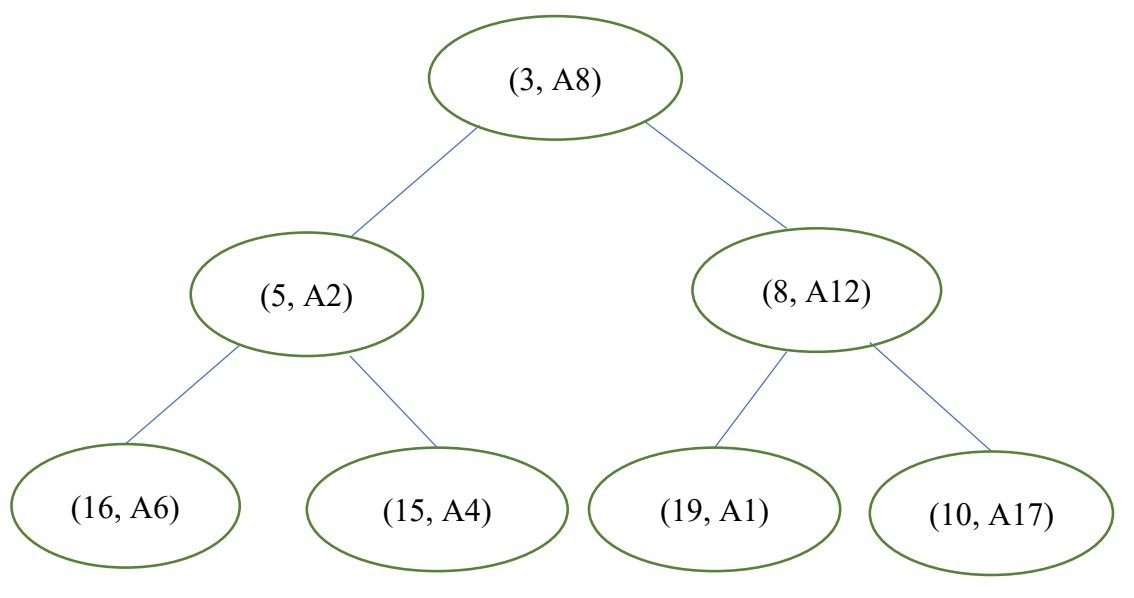 | 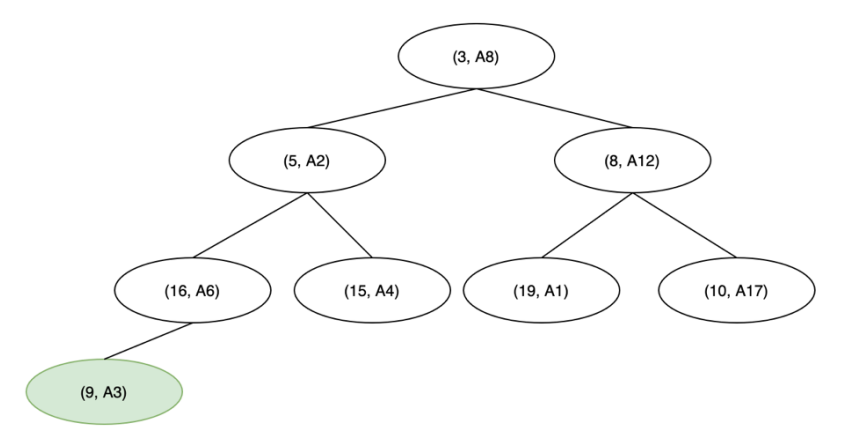 | 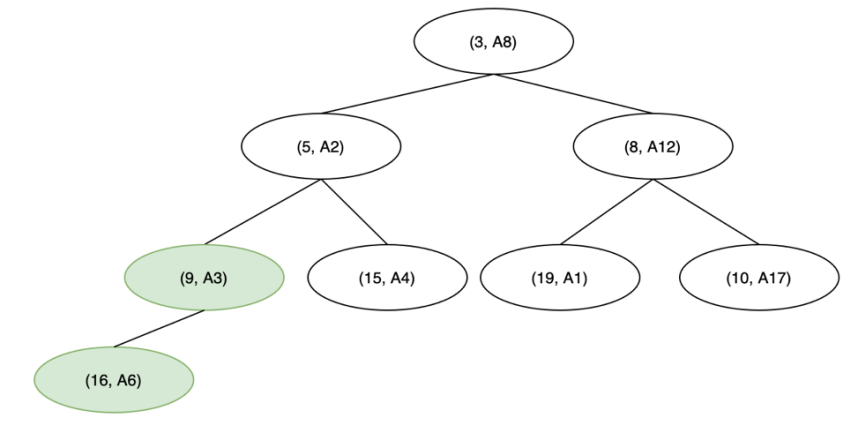 |

For `myP.remove_min()`:

| Original | Step 1 | Step 2 | Step 3 |
| -- | -- | -- | -- | 
| 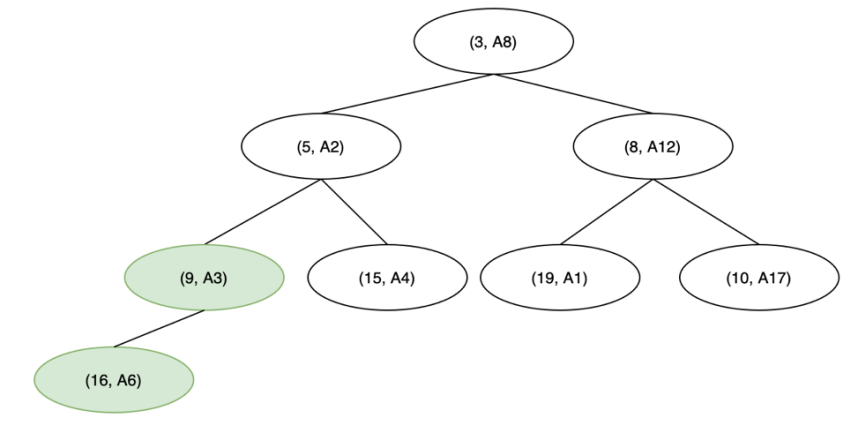 | 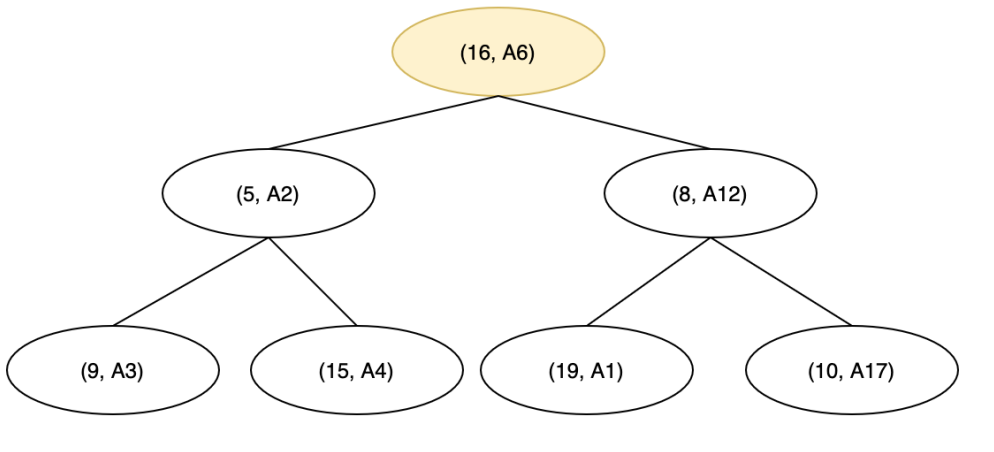 | 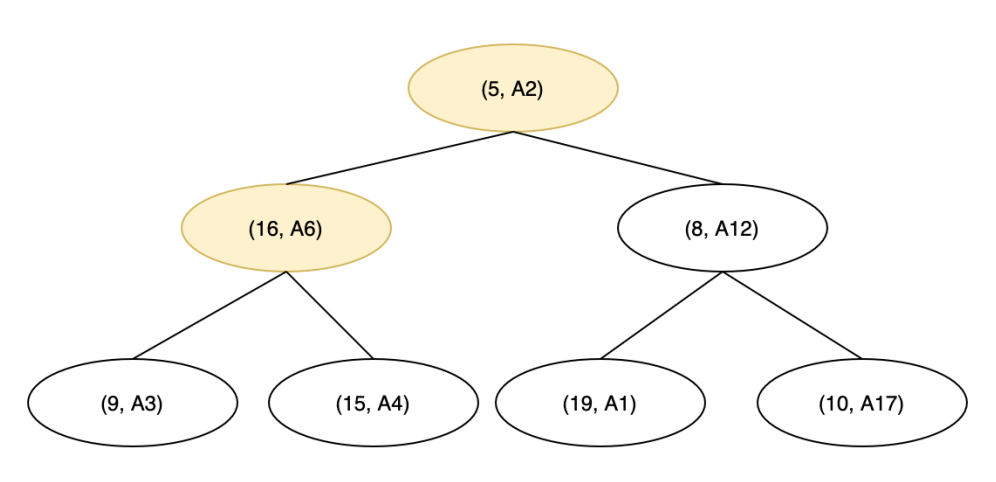 | 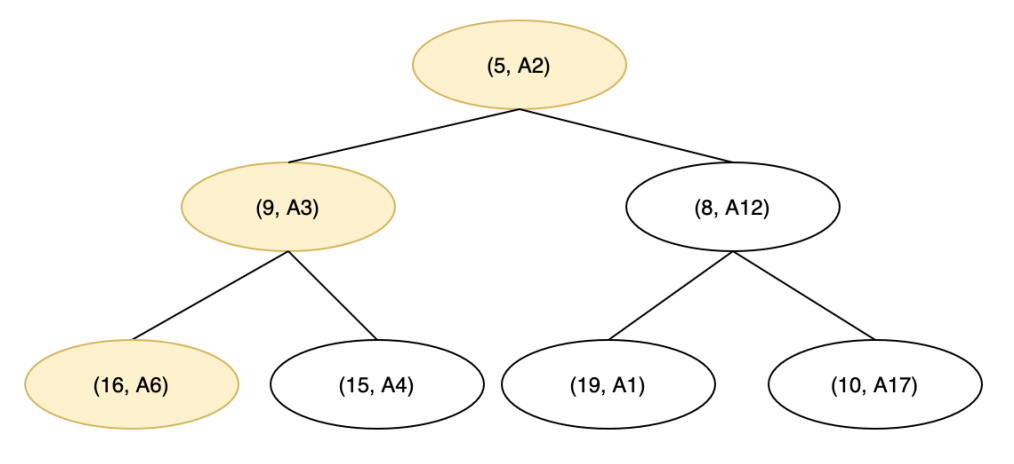 |

For `myP.remove_min()` again:

| Original | Step 1 | Step 2 |
| -- | -- | -- |
| 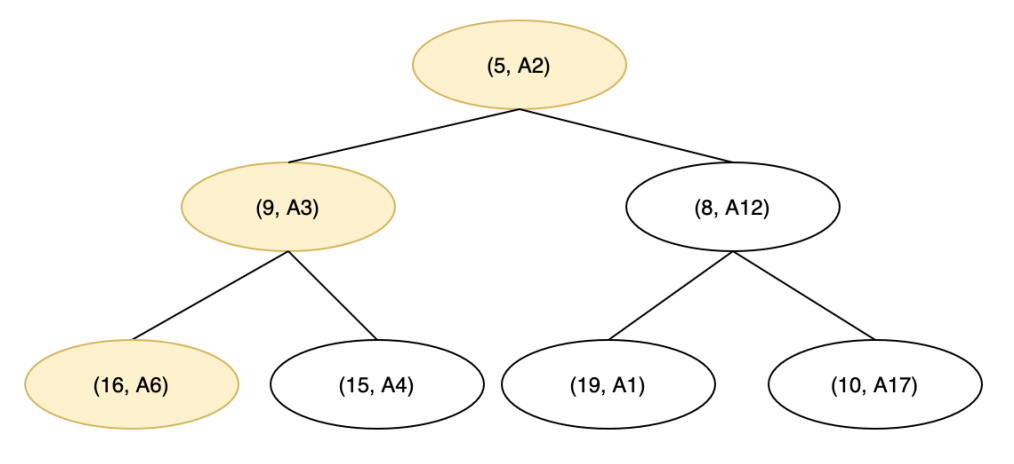 | 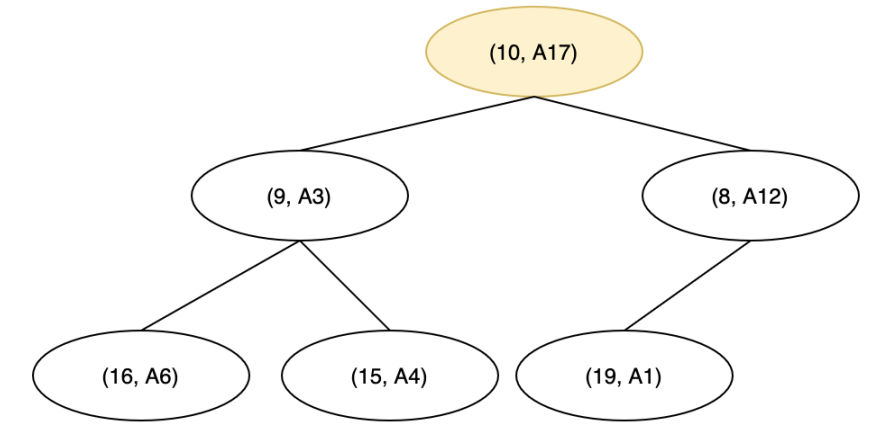 | 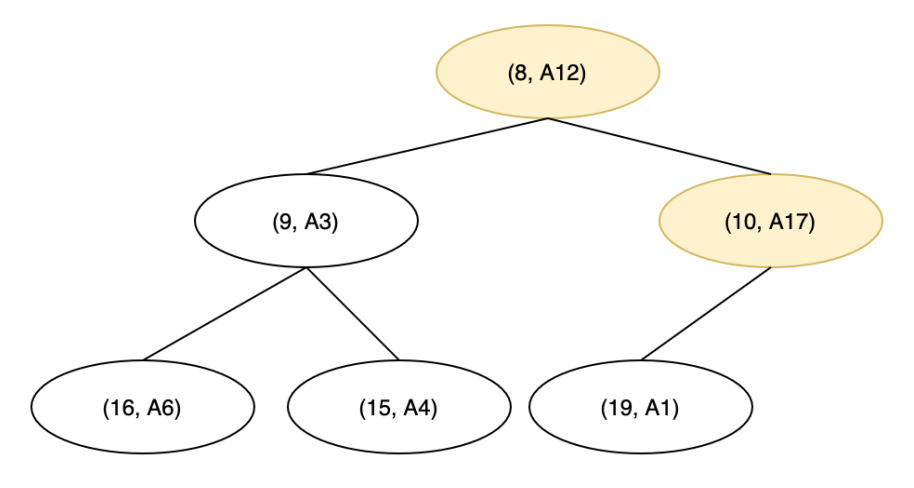 |

For `myP.add(2, A7)`:

| Original | Step 1 | Step 2 | Step 3 |
| -- | -- | -- | -- |
| 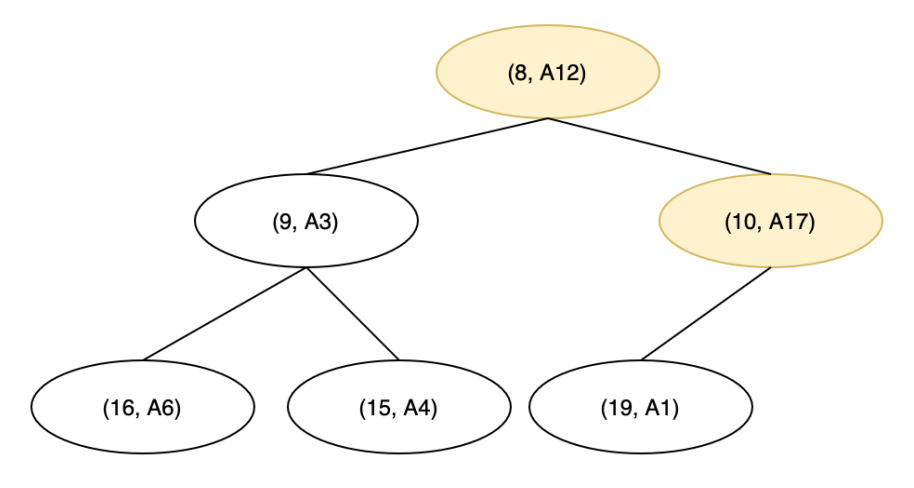 | 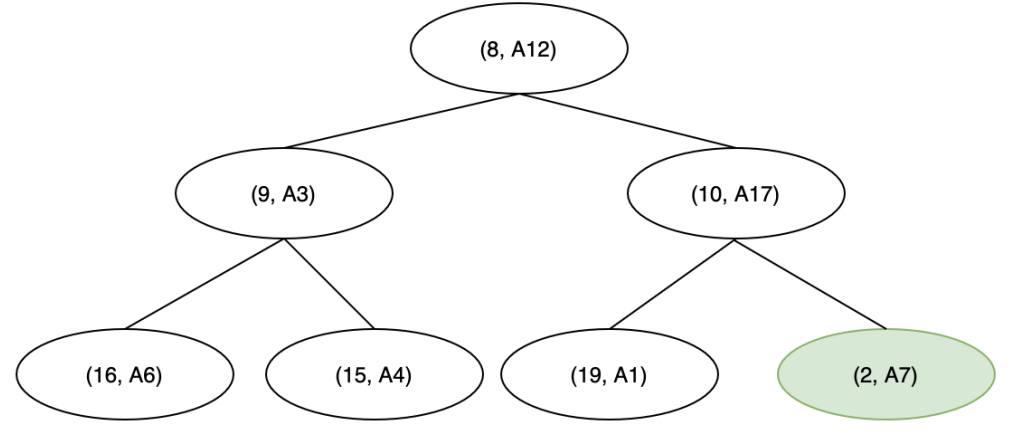 | 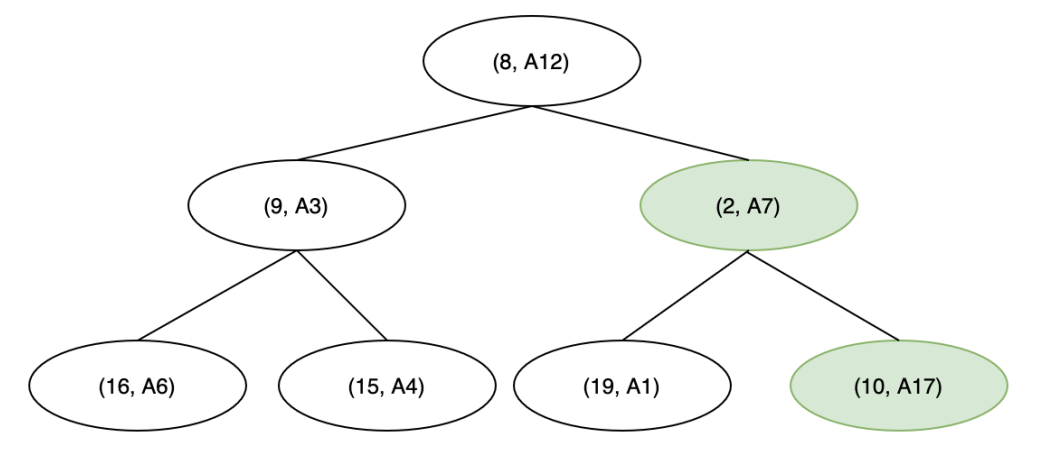 | 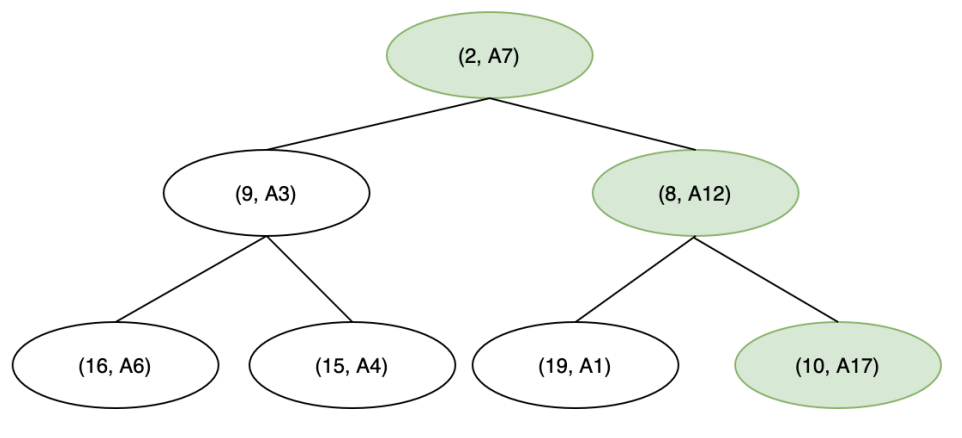 |

For `myP.add(13, A4)`:

| Original | Step 1 | Step 2 |
| -- | -- | -- |
| 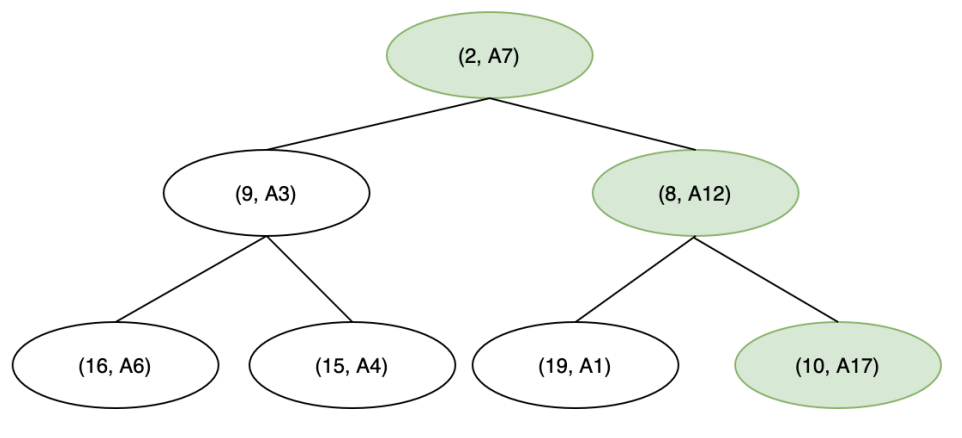 | 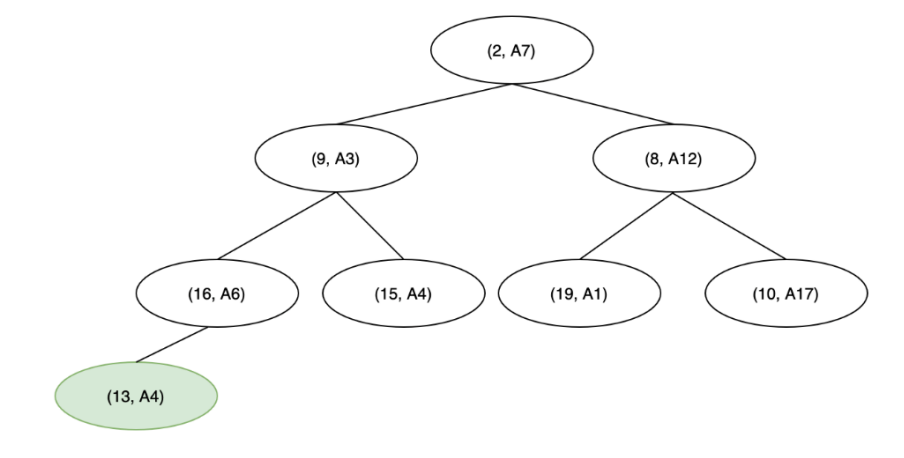 | 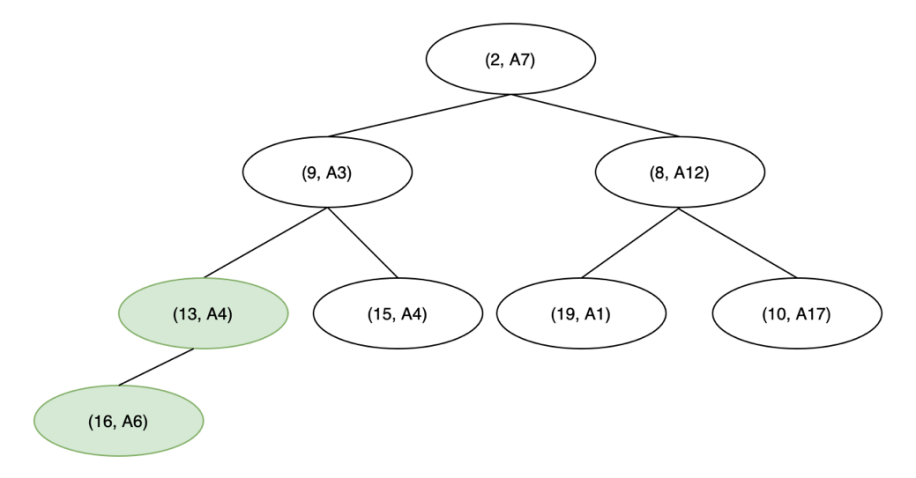 |

#### Question 4c

The time complexity for `remove_min` is $O(\text{log}(n))$.

### TMA02 Question

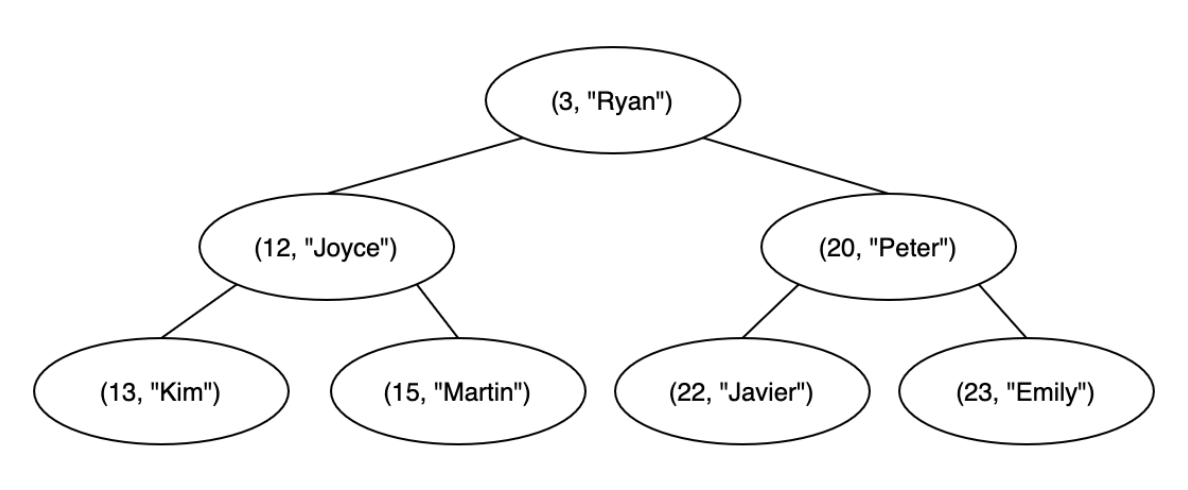

Is this heap binary tree a binary search tree? Explain your answer.

The heap binary tree is not a binary search tree because it doesn’t fulfill the property that the key value of a node is greater than the key values of left sub-tree and less than the key values of right sub-tree. The heap tree has the least/great number at its root.

Analyse the time complexity for the “add” operation?

The time complexity for the “add” operation is $O(\text{log}(n))$. Worst case sift from leave to root, and
the complexity is the height of the tree, which is $O(\text{log}(n))$.